In [1]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder

import json

In [2]:
data = pd.read_csv('data/dataset.csv')
data.head()

,Gender,Age [10-15],Age [16-20],Age [21-25],Age [26-30],Age [31-35],Level,access_to_material_in my academy,family_financial_status_allows_me_to_focus,parent_guardian_support_education_learning,...,rarely_have_conflict_with_classmate_lecturer,constantly_attend_lectures_on_time,avoid_engaging _risky_behavior,family_status_stable_supportive_in _academic_pursuits,parent_guardian_encourages_academic_pursuit,no_significant_family_issues_interfere_academic_pursuit,strong_sense_belonging_university_community,University_provide_adequate_support_academic_pursuit,feel_safe_comfortable_in_school_environment,What_ your_current_CGPA
0,Male,0,0,0,0,1,500L,Strongly Agree,Agree,Agree,...,Not at All,Strongly Agree,Frequently,Stable,Neutral,Disagree,Strong Sense of Belonging,Litle Support,Neutral,3.5 to 4.49
1,Male,0,0,1,0,0,400L,Strongly Agree,Agree,Agree,...,Not at All,Strongly Agree,More Frequently,Stable,Agree,Agree,Strong Sense of Belonging,Neutral,Neutral,3.5 to 4.49
2,Male,0,0,1,0,0,200L,Strongly Disagree,Strongly Disagree,Strongly Disagree,...,Most Frequently,Strongly Disagree,More Frequently,Stable,Strongly Agree,Strongly Agree,Neutral,Neutral,Neutral,4.5 and above
3,Male,0,1,0,0,0,300L,Strongly Agree,Strongly Agree,Strongly Agree,...,Not Frequently,Strongly Agree,More Frequently,Very Stable,Strongly Agree,Strongly Agree,Worst Sense of Belonging,No Support,Strongly Disagree,2.5 to 3.49
4,Male,0,0,1,0,0,400L,Disagree,Neural,Strongly Agree,...,Not Frequently,Agree,Not Frequently,Stable,Strongly Agree,Strongly Disagree,Strong Sense of Belonging,No Support,Neutral,2.5 to 3.49


### EDA

In [3]:
summary_stats = data.describe(include='all')
summary_stats

,Gender,Age [10-15],Age [16-20],Age [21-25],Age [26-30],Age [31-35],Level,access_to_material_in my academy,family_financial_status_allows_me_to_focus,parent_guardian_support_education_learning,...,rarely_have_conflict_with_classmate_lecturer,constantly_attend_lectures_on_time,avoid_engaging _risky_behavior,family_status_stable_supportive_in _academic_pursuits,parent_guardian_encourages_academic_pursuit,no_significant_family_issues_interfere_academic_pursuit,strong_sense_belonging_university_community,University_provide_adequate_support_academic_pursuit,feel_safe_comfortable_in_school_environment,What_ your_current_CGPA
count,1734,1734.000000,1734.000000,1734.000000,1734.000000,1734.000000,1734,1734,1734,1734,...,1734,1734,1734,1734,1734,1734,1734,1734,1734,1734
unique,2,NaN,NaN,NaN,NaN,NaN,4,5,7,6,...,6,5,5,5,5,5,5,5,5,5
top,Female,NaN,NaN,NaN,NaN,NaN,200L,Agree,Agree,Strongly Agree,...,Not at All,Strongly Agree,More Frequently,Very Stable,Strongly Agree,Strongly Agree,Strong Sense of Belonging,Strong Support,Strongly Agree,4.5 and above
freq,1393,NaN,NaN,NaN,NaN,NaN,667,703,759,807,...,952,778,662,716,864,701,882,939,613,816
mean,NaN,0.116494,0.705882,0.135525,0.043253,0.024221,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
std,NaN,0.320909,0.455777,0.342382,0.203484,0.153780,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25%,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50%,NaN,0.000000,1.000000,0.000000,0.000000,0.000000,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75%,NaN,0.000000,1.000000,0.000000,0.000000,0.000000,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1734 entries, 0 to 1733
Data columns (total 23 columns):
 #   Column                                                   Non-Null Count  Dtype 
---  ------                                                   --------------  ----- 
 0   Gender                                                   1734 non-null   object
 1   Age [10-15]                                              1734 non-null   int64 
 2   Age [16-20]                                              1734 non-null   int64 
 3   Age [21-25]                                              1734 non-null   int64 
 4   Age [26-30]                                              1734 non-null   int64 
 5   Age [31-35]                                              1734 non-null   int64 
 6   Level                                                    1734 non-null   object
 7   access_to_material_in my academy                         1734 non-null   object
 8   family_financial_status_allows_me_to_f

In [5]:
data.isnull().sum()

Gender                                                     0
Age [10-15]                                                0
Age [16-20]                                                0
Age [21-25]                                                0
Age [26-30]                                                0
Age [31-35]                                                0
Level                                                      0
access_to_material_in my academy                           0
family_financial_status_allows_me_to_focus                 0
parent_guardian_support_education_learning                 0
feel_supported_accepted_coursemate_friends                 0
atleast_one_close_friend                                   0
positive_supportive_relation_with_lecturers                0
rarely_have_conflict_with_classmate_lecturer               0
constantly_attend_lectures_on_time                         0
avoid_engaging _risky_behavior                             0
family_status_stable_sup

## ENCODE DATA USING LABEL ENCODING

In [6]:
enc_data = data.copy()
quant_columns = ['Age [10-15]', 'Age [16-20]', 'Age [21-25]', 'Age [26-30]', 'Age [31-35]']
cate_columns = [col for col in enc_data.columns if col not in quant_columns and enc_data[col].dtype == 'object']

category_map = {}
for col in cate_columns:
    le = LabelEncoder()
    enc_data[col] = le.fit_transform(enc_data[col])
    category_map[col] = {str(cls): int(label) for cls, label in zip(le.classes_, le.transform(le.classes_))}

# Save category mapping to JSON
with open('category_mapping.json', 'w') as f:
    json.dump(category_map, f)

# Save encoded dataset to CSV
enc_data.to_csv('data/stu_risk_data_encoded.csv', index=False)
print('New encoded dataset saved')
enc_data.head(20)


New encoded dataset saved


,Gender,Age [10-15],Age [16-20],Age [21-25],Age [26-30],Age [31-35],Level,access_to_material_in my academy,family_financial_status_allows_me_to_focus,parent_guardian_support_education_learning,...,rarely_have_conflict_with_classmate_lecturer,constantly_attend_lectures_on_time,avoid_engaging _risky_behavior,family_status_stable_supportive_in _academic_pursuits,parent_guardian_encourages_academic_pursuit,no_significant_family_issues_interfere_academic_pursuit,strong_sense_belonging_university_community,University_provide_adequate_support_academic_pursuit,feel_safe_comfortable_in_school_environment,What_ your_current_CGPA
0,1,0,0,0,0,1,3,3,0,0,...,4,3,0,3,2,1,3,1,2,2
1,1,0,0,1,0,0,2,3,0,0,...,4,3,1,3,0,0,3,2,2,2
2,1,0,0,1,0,0,0,4,6,5,...,1,4,1,3,3,3,1,2,2,3
3,1,0,1,0,0,0,1,3,5,4,...,3,3,1,4,3,3,4,3,4,1
4,1,0,0,1,0,0,2,1,2,4,...,3,0,3,3,3,4,3,3,2,1
5,0,0,1,0,0,0,0,3,0,4,...,1,3,1,4,3,3,3,4,0,2
6,0,0,0,1,0,0,1,3,2,4,...,2,3,1,4,3,2,3,1,2,1
7,1,0,1,0,0,0,0,0,0,0,...,3,3,1,4,0,0,3,4,0,2
8,0,0,1,0,0,0,0,3,0,4,...,3,3,3,4,3,3,3,2,4,2
9,0,0,1,0,0,0,0,3,2,4,...,4,3,1,3,4,0,1,2,0,2


## CORRELATION MATRIX

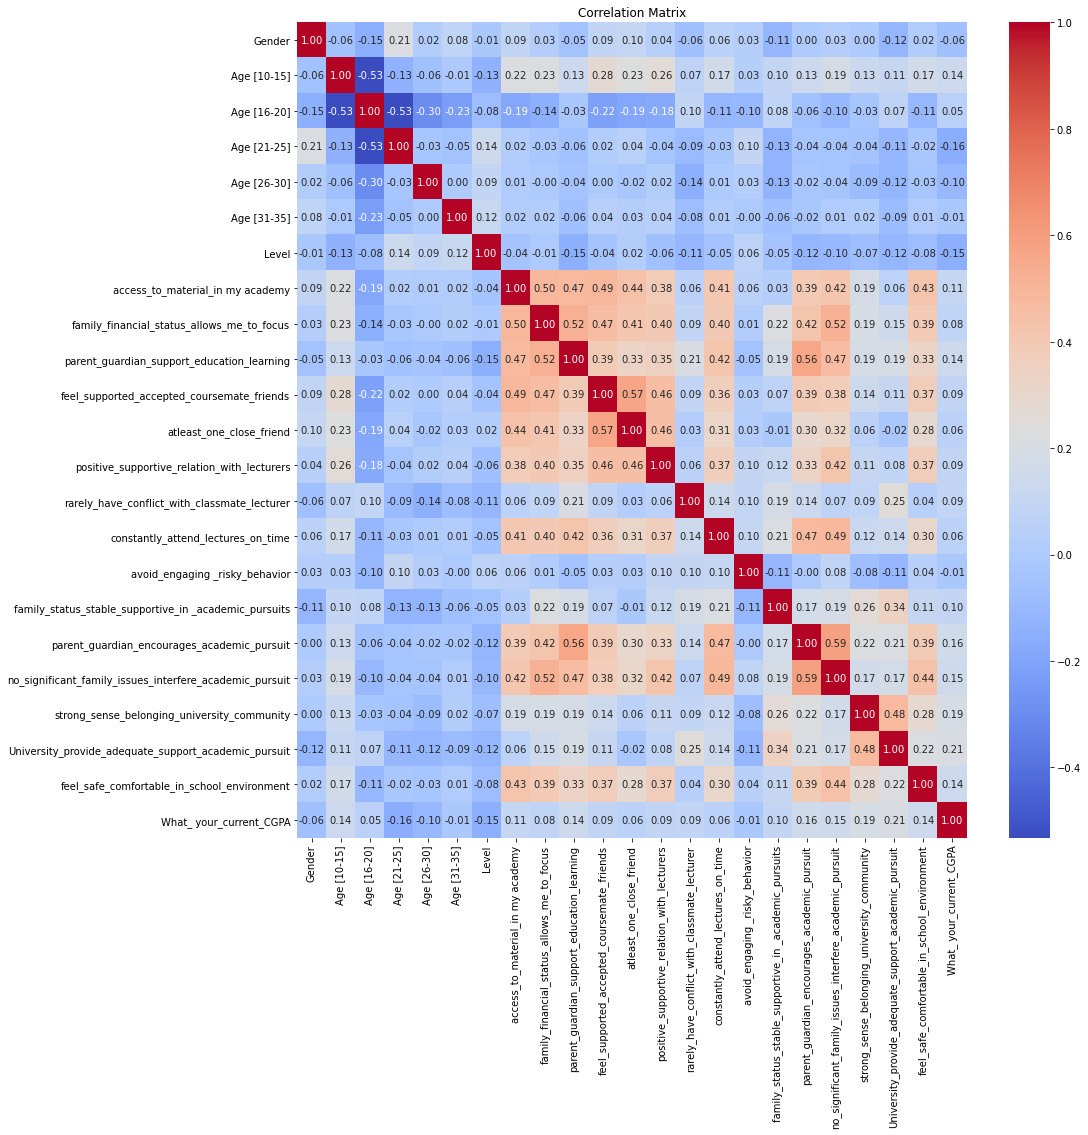

correlations with target variables:/n What_ your_current_CGPA                                    1.000000
University_provide_adequate_support_academic_pursuit       0.206037
strong_sense_belonging_university_community                0.192116
parent_guardian_encourages_academic_pursuit                0.160745
no_significant_family_issues_interfere_academic_pursuit    0.153302
feel_safe_comfortable_in_school_environment                0.144110
parent_guardian_support_education_learning                 0.138233
Age [10-15]                                                0.137694
access_to_material_in my academy                           0.107148
family_status_stable_supportive_in _academic_pursuits      0.102103
rarely_have_conflict_with_classmate_lecturer               0.092002
feel_supported_accepted_coursemate_friends                 0.090023
positive_supportive_relation_with_lecturers                0.085003
family_financial_status_allows_me_to_focus                 0.081972
atleast_on

In [7]:
# data = [
#     'Gender', 'Level', 'parent_guardian_support_education_learning',
#     'positive_supportive_relation_with_lecturers', 
#     'avoid_engaging _risky_behavior', 'family_status_stable_supportive_in _academic_pursuits',
#     'parent_guardian_encourages_academic_pursuit',
#     'no_significant_family_issues_interfere_academic_pursuit',
#     'strong_sense_belonging_university_community', 'University_provide_adequate_support_academic_pursuit',
#     'feel_safe_comfortable_in_school_environment'
# ]
# target_data = 'What_ your_current_CGPA'
# data_subset = enc_data[data + [target_data]]

corr_matrix = enc_data.corr()
plt.figure(figsize =(15,15))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix')
plt.show()

print('correlations with target variables:/n', corr_matrix['What_ your_current_CGPA'].sort_values(ascending=False))


In [8]:
duplicates = enc_data[enc_data.duplicated()]
duplicates

,Gender,Age [10-15],Age [16-20],Age [21-25],Age [26-30],Age [31-35],Level,access_to_material_in my academy,family_financial_status_allows_me_to_focus,parent_guardian_support_education_learning,...,rarely_have_conflict_with_classmate_lecturer,constantly_attend_lectures_on_time,avoid_engaging _risky_behavior,family_status_stable_supportive_in _academic_pursuits,parent_guardian_encourages_academic_pursuit,no_significant_family_issues_interfere_academic_pursuit,strong_sense_belonging_university_community,University_provide_adequate_support_academic_pursuit,feel_safe_comfortable_in_school_environment,What_ your_current_CGPA
141,0,0,1,0,0,0,0,0,0,0,...,4,0,0,3,0,0,0,1,0,3
150,0,0,1,0,0,0,0,0,0,0,...,4,3,3,3,3,0,1,4,0,2
251,0,0,1,0,0,0,0,0,0,0,...,4,0,1,3,0,0,3,4,0,3
274,1,0,1,0,0,0,0,3,5,4,...,4,3,1,4,3,3,3,4,3,2
276,0,0,1,0,0,0,0,3,5,4,...,1,3,1,4,3,3,3,4,3,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1727,1,0,0,1,0,0,0,3,5,4,...,4,3,4,4,3,3,3,4,3,3
1728,1,0,0,1,0,0,2,3,5,4,...,4,3,4,4,3,3,3,4,3,3
1730,1,0,0,1,0,0,1,3,5,4,...,4,3,4,4,3,3,3,4,3,3
1731,1,0,0,1,0,0,1,3,5,4,...,4,3,4,4,3,3,3,4,3,3


In [9]:
print(enc_data['What_ your_current_CGPA'].value_counts())

3    816
2    378
0    242
1    225
4     73
Name: What_ your_current_CGPA, dtype: int64


In [10]:
enc_data.columns

Index(['Gender', 'Age [10-15]', 'Age [16-20]', 'Age [21-25]', 'Age [26-30]',
       'Age [31-35]', 'Level', 'access_to_material_in my academy',
       'family_financial_status_allows_me_to_focus',
       'parent_guardian_support_education_learning',
       'feel_supported_accepted_coursemate_friends',
       'atleast_one_close_friend',
       'positive_supportive_relation_with_lecturers',
       'rarely_have_conflict_with_classmate_lecturer',
       'constantly_attend_lectures_on_time', 'avoid_engaging _risky_behavior',
       'family_status_stable_supportive_in _academic_pursuits',
       'parent_guardian_encourages_academic_pursuit',
       'no_significant_family_issues_interfere_academic_pursuit',
       'strong_sense_belonging_university_community',
       'University_provide_adequate_support_academic_pursuit',
       'feel_safe_comfortable_in_school_environment',
       'What_ your_current_CGPA'],
      dtype='object')